In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [4]:
%matplotlib inline

In [1]:
import requests

In [6]:
from io import StringIO

In [7]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [8]:
source = requests.get(url).text

In [9]:
poll_data = StringIO(source)

In [10]:
poll_df = pd.read_csv(poll_data)

In [11]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [12]:
poll_sort_df = poll_df[['Pollster', 'Partisan','Affiliation']].sort_values('Pollster').drop_duplicates()

In [13]:
def select_affiliation(affiliation):
    if affiliation == 'Dem':
        return 'Obama'
    elif affiliation == 'Rep':
        return 'Romney'
    else:
        return 'None'

In [14]:
poll_sort_df['Affiliation'] =  poll_sort_df['Affiliation'].apply(select_affiliation)

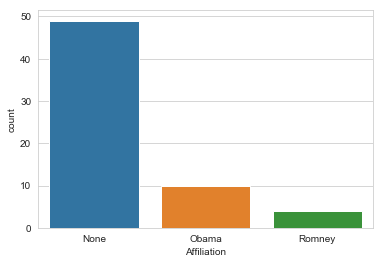

In [15]:
sns.countplot('Affiliation', data = poll_sort_df)

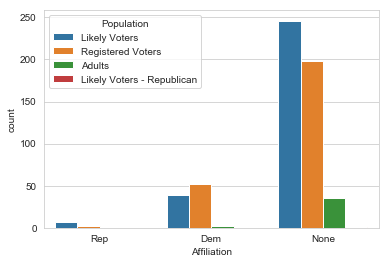

In [16]:
sns.countplot('Affiliation', data = poll_df, hue = 'Population', order = ['Rep','Dem','None'])

In [17]:
avg = pd.DataFrame(poll_df.mean())

In [18]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [20]:
avg.drop(['Question Text','Question Iteration'], inplace = True)

In [21]:
std = pd.DataFrame(poll_df.std())

In [22]:
std.drop(['Number of Observations','Question Text','Question Iteration'], inplace = True)

In [23]:
avg.drop(['Number of Observations'], inplace = True)

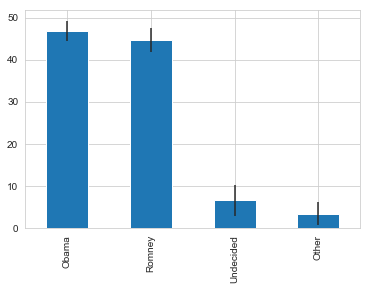

In [24]:
avg.plot(yerr = std, kind = 'bar', legend = False)

In [25]:
poll_avg = pd.concat([avg, std], axis = 1)
poll_avg.columns = ['Average', 'STD']

In [26]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


In [27]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


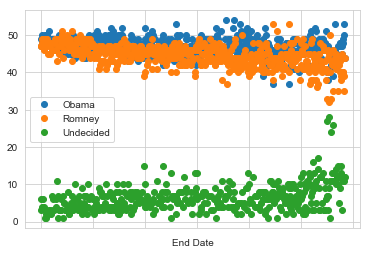

In [28]:
poll_df.plot(x = 'End Date', y = ['Obama', 'Romney','Undecided'], marker = 'o', linestyle = '')

In [29]:
from datetime import datetime

In [30]:
poll_df['Difference'] = DataFrame(poll_df.Obama - poll_df.Romney)/100

In [31]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [32]:
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()

In [33]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


In [41]:
poll_df.drop(['Question Text','Question Iteration'], axis=1, inplace=True)

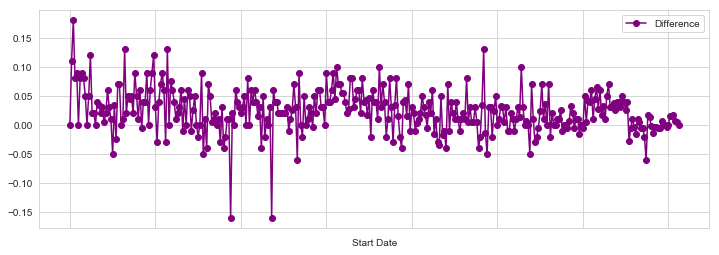

In [45]:
fig = poll_df.plot(x='Start Date', y = 'Difference', 
                   figsize = (12,4), marker = 'o', linestyle = '-', color = 'purple')

In [48]:
poll_df[poll_df['Start Date'].apply(lambda x: x.startswith('2012-10'))]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Difference
325,2012-10-01,1746.000000,48.500000,46.000000,3.000000,NaN,0.025000
326,2012-10-02,590.000000,49.000000,45.000000,6.000000,NaN,0.040000
327,2012-10-04,1061.500000,45.833333,48.666667,6.000000,NaN,-0.028333
328,2012-10-05,1000.000000,46.000000,46.500000,7.000000,1.000000,-0.005000
329,2012-10-06,895.000000,46.500000,45.500000,4.500000,3.000000,0.010000
330,2012-10-07,1197.333333,47.000000,47.333333,4.666667,1.500000,-0.003333
331,2012-10-08,2030.000000,46.500000,48.000000,5.000000,2.000000,-0.015000
332,2012-10-10,1118.000000,48.000000,47.000000,3.500000,2.000000,0.010000
333,2012-10-11,1335.250000,47.000000,46.500000,5.666667,1.666667,0.005000
334,2012-10-12,1231.500000,46.500000,47.000000,6.500000,NaN,-0.005000


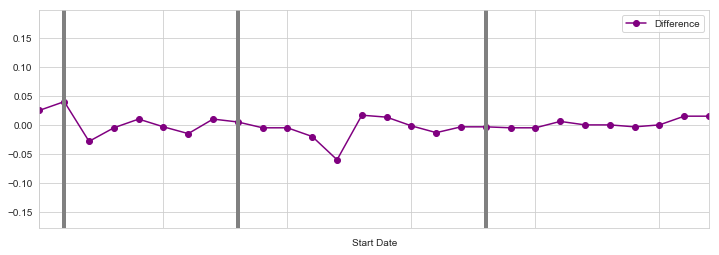

In [51]:
fig = poll_df.plot(x='Start Date', y = 'Difference', figsize = (12,4), marker = 'o',
                   linestyle = '-', color = 'purple', xlim = (325,352))
for index_num in [326,333,343]:
    plt.axvline(x = index_num,linewidth = 4, color = 'gray')